# Loading and visualizing data

`hybrid-drt` provides modules for loading and visualizing impedance spectra and time-domain data. Various data sources can be converted to a standardized format for easy processing. Currently supported file formats include:

* Biologic EC-Lab text exports
* Biologic EC-Lab .mpr files (requires optional `galvani` package)
* RelaxIS text exports
* Gamry .DTA files

If you'd like to import files of a different type, please let me know by creating an issue and providing a sample file, and I will try to incorporate it.

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

from hybdrt.dataload.reader import read_eis, read_chrono
import hybdrt.plotting as hplt

%load_ext autoreload
%autoreload 2

In [2]:
data_path = Path("./data")

# Data loading
## Impedance data

We can read impedance spectra in various formats using `read_eis`. 

### BioLogic EC-Lab .txt exports

We start with an example .txt file exported from BioLogic's EC-Lab.

<span style="color:red">IMPORTANT NOTE:</span> if you open a BioLogic .mpr file in EC-Lab and export it to a text file, you may no longer be able to open the .mpr file directly with Python as shown in the next section. As the .mpr format is proprietary, it is not clear why this is the case. Since my preferred workflow is to load the .mpr files directly into Python, I never use EC-Lab to export text files.

In [3]:
eis_fname = "PEIS_LPSCl_IonBlocking_-25C"
# Read the raw data into a dataframe
# standardize=False keeps the original column names in the file
raw_data = read_eis(data_path.joinpath(f"{eis_fname}.txt"), standardize=False, as_dataframe=True)

raw_data

,freq/Hz,Re(Z)/Ohm,-Im(Z)/Ohm,|Z|/Ohm,Phase(Z)/deg,time/s,<Ewe>/V,<I>/A,cycle number/None,Ns/None,unnamed_10/au
0,7.000018e+06,3.592415e+02,2.909204e+02,4.622652e+02,-39.001194,4.709477,-0.080028,-1.450603e-07,1.0,0,NaN
1,5.552896e+06,4.081452e+02,3.336051e+02,5.271384e+02,-39.261490,6.391489,-0.080034,1.786667e-09,1.0,0,NaN
2,4.404960e+06,4.638213e+02,3.592868e+02,5.867003e+02,-37.762199,7.100500,-0.080027,1.935823e-09,1.0,0,NaN
3,3.494331e+06,5.201661e+02,3.866468e+02,6.481269e+02,-36.623940,8.782492,-0.080050,-2.825793e-10,1.0,0,NaN
4,2.771953e+06,5.844391e+02,4.132764e+02,7.157977e+02,-35.265404,10.464494,-0.080062,-2.631505e-09,1.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
74,2.526358e-01,7.208541e+05,3.622934e+06,3.693952e+06,-78.746841,78.418742,-0.080075,-2.220368e-11,1.0,0,NaN
75,2.002798e-01,9.021344e+05,4.435824e+06,4.526630e+06,-78.504265,88.945175,-0.080068,-1.234872e-11,1.0,0,NaN
76,1.588427e-01,1.139984e+06,5.420088e+06,5.538675e+06,-78.122345,102.210570,-0.080066,-2.068696e-11,1.0,0,NaN
77,1.260549e-01,1.437206e+06,6.639494e+06,6.793264e+06,-77.786011,118.916121,-0.080051,-2.274431e-11,1.0,0,NaN


In [4]:
# Read the data and standardize column names, stil returning a dataframe
std_data = read_eis(data_path.joinpath(f"{eis_fname}.txt"), standardize=True, as_dataframe=True)

std_data

,freq,z_re,z_im,z_mod,z_phase,time,v,i,cycle number/None,Ns/None,unnamed_10/au
0,7.000018e+06,3.592415e+02,-2.909204e+02,4.622652e+02,-39.001194,4.709477,-0.080028,-1.450603e-07,1.0,0,NaN
1,5.552896e+06,4.081452e+02,-3.336051e+02,5.271384e+02,-39.261490,6.391489,-0.080034,1.786667e-09,1.0,0,NaN
2,4.404960e+06,4.638213e+02,-3.592868e+02,5.867003e+02,-37.762199,7.100500,-0.080027,1.935823e-09,1.0,0,NaN
3,3.494331e+06,5.201661e+02,-3.866468e+02,6.481269e+02,-36.623940,8.782492,-0.080050,-2.825793e-10,1.0,0,NaN
4,2.771953e+06,5.844391e+02,-4.132764e+02,7.157977e+02,-35.265404,10.464494,-0.080062,-2.631505e-09,1.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
74,2.526358e-01,7.208541e+05,-3.622934e+06,3.693952e+06,-78.746841,78.418742,-0.080075,-2.220368e-11,1.0,0,NaN
75,2.002798e-01,9.021344e+05,-4.435824e+06,4.526630e+06,-78.504265,88.945175,-0.080068,-1.234872e-11,1.0,0,NaN
76,1.588427e-01,1.139984e+06,-5.420088e+06,5.538675e+06,-78.122345,102.210570,-0.080066,-2.068696e-11,1.0,0,NaN
77,1.260549e-01,1.437206e+06,-6.639494e+06,6.793264e+06,-77.786011,118.916121,-0.080051,-2.274431e-11,1.0,0,NaN


In [5]:
# Read the data and convert to a standardized ZData instance
# with_timestamp=True extracts the timestamp from the file metadata
zdata = read_eis(data_path.joinpath(f"{eis_fname}.txt"), with_timestamp=True)

print("timestamp:", zdata.timestamp)

# All column names are standardized, and only essential columns are kept
zdata.as_dataframe()

timestamp: 2025-05-15 01:18:45.867000


,freq,z_re,z_im,z_mod,z_phase,time
0,7.000018e+06,3.592415e+02,-2.909204e+02,4.622652e+02,-39.001193,4.709477
1,5.552896e+06,4.081452e+02,-3.336051e+02,5.271384e+02,-39.261488,6.391489
2,4.404960e+06,4.638213e+02,-3.592868e+02,5.867003e+02,-37.762199,7.100500
3,3.494331e+06,5.201661e+02,-3.866468e+02,6.481270e+02,-36.623940,8.782492
4,2.771953e+06,5.844391e+02,-4.132764e+02,7.157977e+02,-35.265404,10.464494
...,...,...,...,...,...,...
74,2.526358e-01,7.208541e+05,-3.622934e+06,3.693952e+06,-78.746842,78.418742
75,2.002798e-01,9.021344e+05,-4.435824e+06,4.526630e+06,-78.504269,88.945175
76,1.588427e-01,1.139984e+06,-5.420088e+06,5.538675e+06,-78.122344,102.210570
77,1.260549e-01,1.437206e+06,-6.639494e+06,6.793264e+06,-77.786013,118.916121


In [6]:
# You can also view data as a generic immittance (impedance or admittance) dataframe 
zdata.as_generic_dataframe()

,freq,real,imag,modulus,phase,time
0,7.000018e+06,3.592415e+02,-2.909204e+02,4.622652e+02,-39.001193,4.709477
1,5.552896e+06,4.081452e+02,-3.336051e+02,5.271384e+02,-39.261488,6.391489
2,4.404960e+06,4.638213e+02,-3.592868e+02,5.867003e+02,-37.762199,7.100500
3,3.494331e+06,5.201661e+02,-3.866468e+02,6.481270e+02,-36.623940,8.782492
4,2.771953e+06,5.844391e+02,-4.132764e+02,7.157977e+02,-35.265404,10.464494
...,...,...,...,...,...,...
74,2.526358e-01,7.208541e+05,-3.622934e+06,3.693952e+06,-78.746842,78.418742
75,2.002798e-01,9.021344e+05,-4.435824e+06,4.526630e+06,-78.504269,88.945175
76,1.588427e-01,1.139984e+06,-5.420088e+06,5.538675e+06,-78.122344,102.210570
77,1.260549e-01,1.437206e+06,-6.639494e+06,6.793264e+06,-77.786013,118.916121


In [7]:
# ZData instances also provide attributes for easy access to key data
for name in ["freq", "z", "z_re", "z_im", "z_mod", "z_phase"]:
    print(f"zdata.{name}: {getattr(zdata, name)[:3]}...{getattr(zdata, name)[-3:]}")

zdata.freq: [7000018.5 5552896.5 4404960.5]...[0.15884265 0.12605488 0.10002181]
zdata.z: [359.24146-290.92038j 408.1452 -333.6051j  463.82129-359.2868j ]...[1139984.3-5420088.j  1437206.1-6639494.j  1799427.6-8093785.5j]
zdata.z_re: [359.24146 408.1452  463.82129]...[1139984.3 1437206.1 1799427.6]
zdata.z_im: [-290.92038 -333.6051  -359.2868 ]...[-5420088.  -6639494.  -8093785.5]
zdata.z_mod: [462.26517723 527.1383756  586.70025883]...[5538674.76315323 6793264.45458391 8291399.36365702]
zdata.z_phase: [-39.00119265 -39.26148795 -37.76219922]...[-78.12234398 -77.78601299 -77.46573771]


In [8]:
# You can trim the frequency range of the data, returning a new ZData instance
zdata_trimmed = zdata.trim_freq(f_min=100, f_max=1e3)
zdata_trimmed.as_dataframe()

,freq,z_re,z_im,z_mod,z_phase,time
0,836.87158,1953.3011,-2658.4041,3298.863069,-53.692873,28.867312
1,663.51367,2066.1147,-3257.6641,3857.616536,-57.615824,29.336228
2,526.51611,2207.9905,-3984.2368,4555.147081,-61.005589,29.802177
3,417.72723,2380.8889,-4866.0537,5417.297349,-63.928173,30.269851
4,331.37872,2576.4377,-5973.5991,6505.529758,-66.669266,30.734905
5,262.89673,2812.4839,-7299.8423,7822.899929,-68.929319,31.205361
6,208.46576,3115.8574,-8964.7627,9490.813327,-70.834226,31.676219
7,165.37010,3442.7727,-11001.2260,11527.343899,-72.622778,32.141299
8,131.21739,3874.6995,-13516.0200,14060.444262,-74.003748,32.604882
9,104.10026,4380.9707,-16563.6150,17133.191359,-75.184885,33.075512


In [9]:
# You can also convert impedance to admittance, returning a YData instance
ydata = zdata.invert()
ydata.as_dataframe()

,freq,y_re,y_im,y_mod,y_phase,time
0,7.000018e+06,1.681141e-03,1.361419e-03,2.163261e-03,39.001193,4.709477
1,5.552896e+06,1.468809e-03,1.200559e-03,1.897035e-03,39.261488,6.391489
2,4.404960e+06,1.347467e-03,1.043779e-03,1.704448e-03,37.762199,7.100500
3,3.494331e+06,1.238289e-03,9.204374e-04,1.542908e-03,36.623940,8.782492
4,2.771953e+06,1.140666e-03,8.066032e-04,1.397043e-03,35.265404,10.464494
...,...,...,...,...,...,...
74,2.526358e-01,5.282807e-08,2.655082e-07,2.707127e-07,78.746842,78.418742
75,2.002798e-01,4.402722e-08,2.164832e-07,2.209149e-07,78.504269,88.945175
76,1.588427e-01,3.716098e-08,1.766829e-07,1.805486e-07,78.122344,102.210570
77,1.260549e-01,3.114311e-08,1.438725e-07,1.472046e-07,77.786013,118.916121


### BioLogic EC-Lab .mpr files

To read EC-Lab .mpr files directly without exporting them to text files, you will need to install the optional `galvani` package (see the README for details).

Here we load the same dataset contained in the exported .txt file above, but read it directly from the .mpr file (no export required).

In [10]:
# Read the data from mpr and convert to a standardized ZData instance
zdata = read_eis(data_path.joinpath(f"{eis_fname}.mpr"), with_timestamp=True)

print("timestamp:", zdata.timestamp)
zdata.as_dataframe()

timestamp: 2025-05-15 01:18:45.867000


,freq,z_re,z_im,z_mod,z_phase,time
0,7.000018e+06,3.592415e+02,-2.909204e+02,4.622652e+02,-39.001194,4.709477
1,5.552896e+06,4.081452e+02,-3.336051e+02,5.271384e+02,-39.261490,6.391489
2,4.404960e+06,4.638213e+02,-3.592868e+02,5.867003e+02,-37.762199,7.100500
3,3.494331e+06,5.201661e+02,-3.866468e+02,6.481270e+02,-36.623940,8.782492
4,2.771953e+06,5.844391e+02,-4.132764e+02,7.157977e+02,-35.265404,10.464494
...,...,...,...,...,...,...
74,2.526358e-01,7.208541e+05,-3.622934e+06,3.693952e+06,-78.746841,78.418742
75,2.002798e-01,9.021344e+05,-4.435824e+06,4.526630e+06,-78.504272,88.945175
76,1.588427e-01,1.139984e+06,-5.420088e+06,5.538674e+06,-78.122345,102.210570
77,1.260549e-01,1.437206e+06,-6.639494e+06,6.793264e+06,-77.786011,118.916121


### RelaxIS .txt exports

You can also load .txt files exported by RelaxIS. This is the same dataset as above, exported by RelaxIS.

In [11]:
# Read the data from mpr and convert to a standardized ZData instance
zdata = read_eis(data_path.joinpath(f"{eis_fname}_RelaxIS.txt"))

zdata.as_dataframe()

,freq,z_re,z_im,z_mod,z_phase,time
0,1.000218e-01,1.799428e+06,-8.093786e+06,8.291399e+06,-77.465738,None
1,1.260549e-01,1.437206e+06,-6.639494e+06,6.793264e+06,-77.786013,None
2,1.588427e-01,1.139984e+06,-5.420088e+06,5.538675e+06,-78.122344,None
3,2.002798e-01,9.021344e+05,-4.435824e+06,4.526630e+06,-78.504269,None
4,2.526358e-01,7.208541e+05,-3.622934e+06,3.693952e+06,-78.746842,None
...,...,...,...,...,...,...
74,2.771953e+06,5.844391e+02,-4.132764e+02,7.157977e+02,-35.265404,None
75,3.494331e+06,5.201661e+02,-3.866468e+02,6.481270e+02,-36.623940,None
76,4.404960e+06,4.638213e+02,-3.592868e+02,5.867003e+02,-37.762200,None
77,5.552896e+06,4.081452e+02,-3.336051e+02,5.271384e+02,-39.261488,None


### Gamry .DTA files

We can also load Gamry .DTA files with the same function.

TODO: replace Gamry EIS data

In [12]:
# Read the data from mpr and convert to a standardized ZData instance
zdata = read_eis(data_path.joinpath("EISGALV_EISTest3.DTA"), with_timestamp=True)

print("timestamp:", zdata.timestamp)
zdata.as_dataframe()

timestamp: 2024-10-25 21:09:58.727375


,freq,z_re,z_im,z_mod,z_phase,time
0,1.000078e+06,0.047117,0.169582,0.176006,74.472379,1.541807
1,7.943906e+05,0.039610,0.133854,0.139592,73.515314,1.847517
2,6.309844e+05,0.034550,0.108030,0.113420,72.264578,2.147836
3,5.012344e+05,0.030866,0.086720,0.092049,70.408192,2.665093
4,3.981094e+05,0.028551,0.069484,0.075121,67.662461,2.975051
...,...,...,...,...,...,...
66,2.520161e-01,0.065438,-0.002092,0.065471,-1.830732,118.698100
67,2.003205e-01,0.065714,-0.001783,0.065738,-1.553805,148.727000
68,1.588983e-01,0.065870,-0.001556,0.065889,-1.352953,185.360700
69,1.260081e-01,0.066180,-0.001321,0.066193,-1.143751,222.304900


## Time-domain data

Time-domain data (i.e. current and voltage vs. time), such as open-circuit voltage, chronopotentiometry, or chronoamperometry measurements, can also be loaded with `read_chrono`. Time-domain measurements are important in `hybrid-drt` for joint-domain impedance extraction (see the tutorial "Fitting joint-domain data").

The same file formats are supported for time-domain data, with the exception of RelaxIS exports (to the best of my knowledge, RelaxIS only supports impedance spectra).

### BioLogic EC-Lab .txt exports

In [13]:
chrono_fname = "CP_SSB"

# Read raw chrono data into dataframe
# standardize=False keeps the original column names
# All units are automatically scaled to base units (e.g. mA is converted to A)
raw_data = read_chrono(data_path.joinpath(f"{chrono_fname}.txt"), standardize=False, as_dataframe=True)
raw_data

,time/s,Ewe/V,I/A,I Range/None,unnamed_4/au,step time/s,Ns/None,unnamed_7/au
0,19.894801,2.923152,-1.930681e-08,41,0,0.000000,0,NaN
1,19.895801,2.923593,-2.045216e-08,41,0,19.895801,0,NaN
2,19.896801,2.923791,-2.007038e-08,41,0,19.896801,0,NaN
3,19.897801,2.923776,-1.892502e-08,41,0,19.897801,0,NaN
4,19.898801,2.923730,-1.777969e-08,41,0,19.898801,0,NaN
...,...,...,...,...,...,...,...,...
30203,50.092200,2.922896,-1.639687e-08,41,0,14.996200,7,NaN
30204,50.093200,2.922900,-1.708026e-08,41,0,14.997200,7,NaN
30205,50.094200,2.922888,-1.622888e-08,41,0,14.998200,7,NaN
30206,50.095200,2.922869,-1.492700e-08,41,0,14.999200,7,NaN


In [14]:
# Read chrono data into dataframe with standardized column names
std_data = read_chrono(data_path.joinpath(f"{chrono_fname}.txt"), standardize=True, as_dataframe=True)
std_data

,time,v,i,I Range/None,unnamed_4/au,step time/s,Ns/None,unnamed_7/au
0,19.894801,2.923152,-1.930681e-08,41,0,0.000000,0,NaN
1,19.895801,2.923593,-2.045216e-08,41,0,19.895801,0,NaN
2,19.896801,2.923791,-2.007038e-08,41,0,19.896801,0,NaN
3,19.897801,2.923776,-1.892502e-08,41,0,19.897801,0,NaN
4,19.898801,2.923730,-1.777969e-08,41,0,19.898801,0,NaN
...,...,...,...,...,...,...,...,...
30203,50.092200,2.922896,-1.639687e-08,41,0,14.996200,7,NaN
30204,50.093200,2.922900,-1.708026e-08,41,0,14.997200,7,NaN
30205,50.094200,2.922888,-1.622888e-08,41,0,14.998200,7,NaN
30206,50.095200,2.922869,-1.492700e-08,41,0,14.999200,7,NaN


In [15]:
# Read chrono data into ChronoData instance with standardized column names
# Only essential columns are kept
# All units are base SI units (s, A, V)
# with_timestamp=True extracts the timestamp from the file metadata
cdata = read_chrono(data_path.joinpath(f"{chrono_fname}.txt"), with_timestamp=True)

print("timestamp:", cdata.timestamp)
cdata.as_dataframe()

timestamp: 2024-05-17 14:09:11.952000


,time,i,v
0,19.894801,-1.930681e-08,2.923152
1,19.895801,-2.045216e-08,2.923593
2,19.896801,-2.007038e-08,2.923791
3,19.897801,-1.892502e-08,2.923776
4,19.898801,-1.777969e-08,2.923730
...,...,...,...
30203,50.092200,-1.639687e-08,2.922896
30204,50.093200,-1.708026e-08,2.922900
30205,50.094200,-1.622888e-08,2.922888
30206,50.095200,-1.492700e-08,2.922869


In [16]:
# ChronoData instances also provide attributes for easy access to key data
for name in cdata.fields:
    print(f"cdata.{name}: {getattr(cdata, name)[:3]}...{getattr(cdata, name)[-3:]}")

cdata.time: [19.89480058 19.89580058 19.89680058]...[50.09419981 50.09519981 50.09599981]
cdata.i: [-1.9306810e-08 -2.0452158e-08 -2.0070380e-08]...[-1.6228885e-08 -1.4927003e-08 -1.6091442e-08]
cdata.v: [2.923152  2.9235935 2.9237912]...[2.922888  2.922869  2.9228919]


In [17]:
# We can trim the chrono data to a specific time range, returning a new ChronoData instance
cdata_trimmed = cdata.trim_time(t_min=25, t_max=30)
cdata_trimmed.as_dataframe()

,time,i,v
0,25.0006,-0.000008,2.912176
1,25.0016,-0.000008,2.912172
2,25.0026,-0.000008,2.912149
3,25.0036,-0.000008,2.912115
4,25.0046,-0.000008,2.912172
...,...,...,...
4996,29.9958,0.000008,2.937479
4997,29.9968,0.000008,2.937491
4998,29.9978,0.000008,2.937544
4999,29.9988,0.000008,2.937472


### BioLogic .mpr files

In [18]:
cdata = read_chrono(data_path.joinpath(f"{chrono_fname}.mpr"))
cdata.as_dataframe()

,time,i,v
0,19.894801,-1.930681e-08,2.923152
1,19.895801,-2.045216e-08,2.923594
2,19.896801,-2.007038e-08,2.923791
3,19.897801,-1.892502e-08,2.923776
4,19.898801,-1.777969e-08,2.923730
...,...,...,...
30203,50.092200,-1.639687e-08,2.922896
30204,50.093200,-1.708026e-08,2.922899
30205,50.094200,-1.622889e-08,2.922888
30206,50.095200,-1.492700e-08,2.922869


### Gamry .DTA files

Gamry .DTA files can be loaded in the same way.

TODO: add Gamry chrono data

# Visualizing data

## Plotting impedance data

You can plot impedance spectra with several functions from the `hybdrt.plotting` module. The input data for plotting can either be an `ImmittanceData` instance (`ZData` or `YData`) as returned by `read_eis`, a tuple (frequency, z), or a dataframe with columns 'freq', 'real', 'imag', 'modulus', and 'phase'.

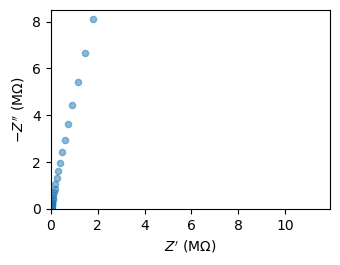

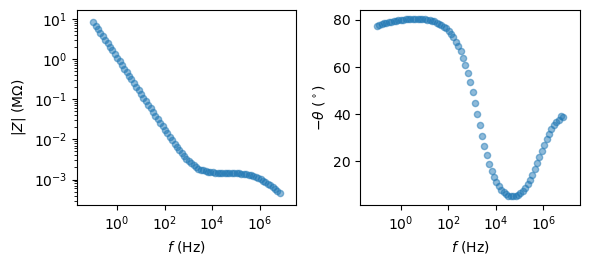

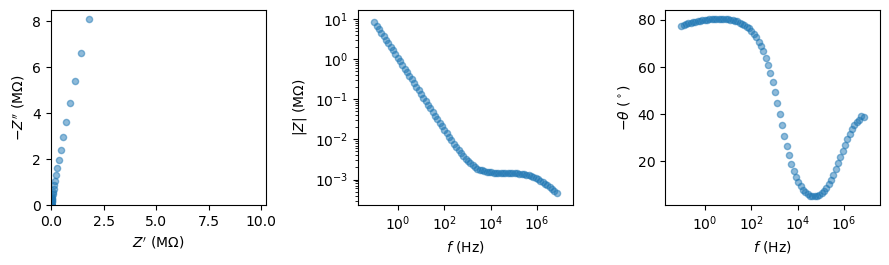

In [19]:
# Load EC-Lab EIS data again
zdata = read_eis(data_path.joinpath(f"{eis_fname}.txt"))

# You can plot data using plot_nyquist, plot_bode, and plot_eis (nyquist and bode plots) 
# Units are auto-scaled to the appropriate scale, in this case mega-Ohms
nyq_ax = hplt.plot_nyquist(zdata)
bode_axes = hplt.plot_bode(zdata)
combo_axes = hplt.plot_eis(zdata)

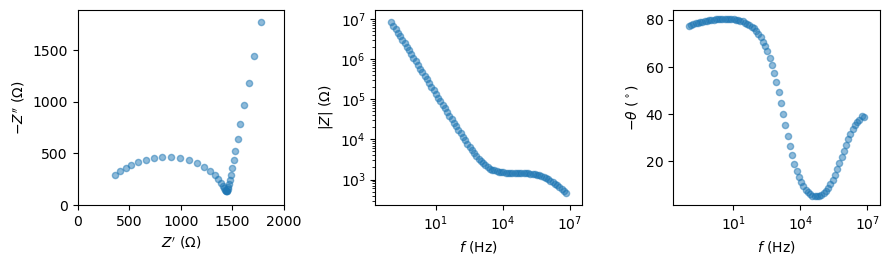

In [20]:
# Plot impedance with auto-scaling disabled by setting scale_prefix=""
axes = hplt.plot_eis(zdata, scale_prefix="")

# Zoom in on the Nyquist plot x-axis from 0 to 2000 Ohms to view the high-frequency semicircle
hplt.zoom_nyquist_x(axes[0], (0, 2000), ymin=0)


array([<Axes: xlabel='$Z^\\prime$ (k$\\Omega$)', ylabel='$-Z^{\\prime\\prime}$ (k$\\Omega$)'>,
       <Axes: xlabel='$f$ (Hz)', ylabel='$|Z|$ (k$\\Omega$)'>,
       <Axes: xlabel='$f$ (Hz)', ylabel='$-$$\\theta$ ($^\\circ$)'>],
      dtype=object)

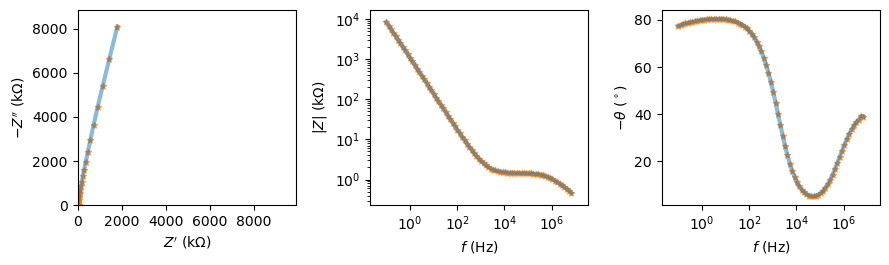

In [21]:
# Plots can be customized by passing in keyword arguments
# We can force a unit scale by setting scale_prefix. Here we use "k" to force kilo-Ohm scaling
# For example, we can change marker size, color, and transparency
axes = hplt.plot_eis(zdata, scale_prefix="k", marker="*", s=20, alpha=0.7, c="C1")

# You can also plot multiple datasets on the same axes, and change from scatter to line plots using the plot_func argument
hplt.plot_eis(zdata, scale_prefix="k", plot_func='plot', c="C0", alpha=0.5, lw=3, axes=axes)


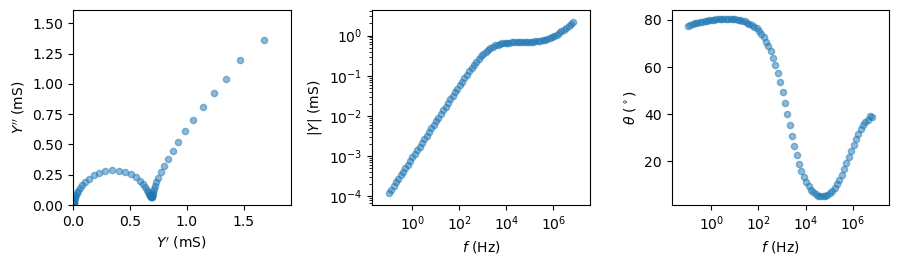

In [22]:
# Plot as admittance
y_axes = hplt.plot_eis(zdata.invert())

## Plotting time-domain data

You can plot time-domain data using `plot_chrono`. The input data can either be a `ChronoData` instance as returned by `read_chrono`, a tuple (time, i, v), or a dataframe with columns 'time', 'i', and 'v'.

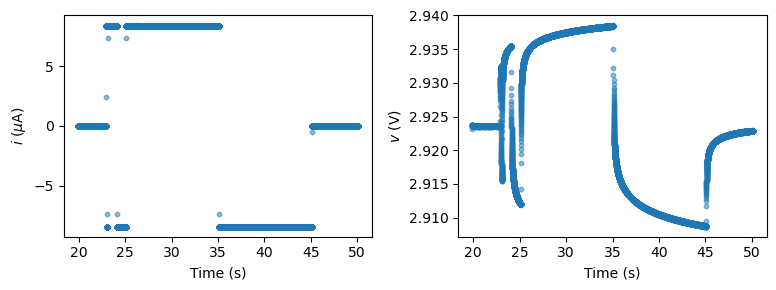

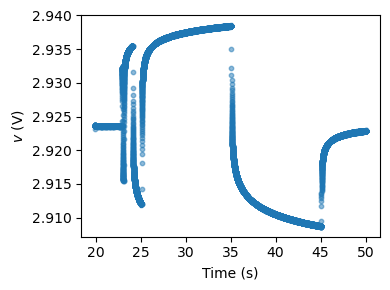

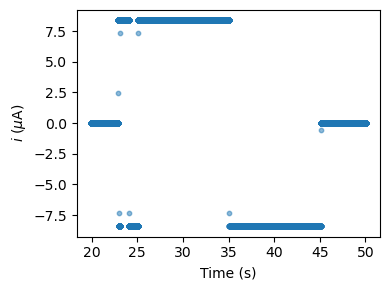

In [23]:
# Load the EC-Lab chrono data again
cdata = read_chrono(data_path.joinpath(f"{chrono_fname}.txt"))

# Plot current and voltage vs. time
combo_axes = hplt.plot_chrono(cdata)
# Plot only voltage
v_ax = hplt.plot_chrono(cdata, plot_i=False)[0]
# Plot only current
i_ax = hplt.plot_chrono(cdata, plot_v=False)[0]


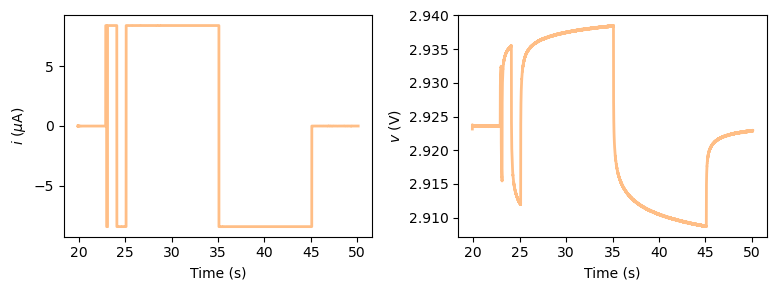

In [24]:
# Plot using pyplot.plot instead of pyplot.scatter, with additional keyword arguments
line_axes = hplt.plot_chrono(cdata, plot_func='plot', c="C1", alpha=0.5, lw=2)